<a href="https://colab.research.google.com/github/jonahokiru/hello-world/blob/master/Real_copy_of_chaplin's_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**THE CHAPLIN’S ENSEMBLE**


**MEMBERS**:

1. Eltonjohn Oketch

2. Brendon Achoki

3. Jonah Okiru

4. Lydia Obare

5. Ruth Mwaura

6. Elizabeth Kihungi



## 1. Define the question.

### a) Specifying the question.

Build a machine learning model that will help to classify the customers questions as Humorous and Non humorous and if humorous, indicate the reasons why the custmers question was so.

### b) The Metric of success.

Building a model with an accuracy of not less than 90% and deploy this model on streamlit.

### c) Understanding the contest.
According to corporate surveys, we have determined that some products have bias in PQA platforms where they attract more humorous questions than others.  
Naturally, humorous questions are an  integral part of PQAs(Product Question Answering platforms) systems. These are web service systems which enable users to post questions and get feedback regarding certain products. Some products attract humor due to their unreasonable price, their peculiar functionality, or in cases that users emphasize their critical point-of-view through humor. 

### d) Recording the experimental design.

Hpothesis: Classify the customer question on a product as either humorous or Non humorous.

X-Axis: The questions.

y-Axis: The class labels (0, 1)

Experimental setup: Classify the questions on the product as either humoros(1) and non humoros(0) based on the questions customers asked about the product.

Design of the Experiment: Analyze 27916 asked by the customers about avarious products.

Sample size: 27916 questions.

## 2 Import the required Libraries.

In [65]:
#IMPORTS
import pandas as pd
import numpy as np 

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

## 3.Data loading.

### Loading the data

In [66]:
url='https://humor-detection-pds.s3-us-west-2.amazonaws.com/Humorous.csv'

url1='https://humor-detection-pds.s3-us-west-2.amazonaws.com/Non-humours-biased.csv'

url2='https://humor-detection-pds.s3-us-west-2.amazonaws.com/Non-humorous-unbiased.csv'

#reading the datasets
def read (data):
  return pd.read_csv(data)

humorous=read(url)

biased=read(url1)

unbiased=read(url2)



The above function reads and load the csv data into the pandas Dataframes.

### preview the data

In [67]:
#previewing the datasets
#dataset1 first 5 rows
humorous.head(2)

,question,product_description,image_url,label
0,Will the volca sample get me a girlfriend?,Korg Amplifier Part VOLCASAMPLE,http://ecx.images-amazon.com/images/I/81I1XZea...,1
1,Can u communicate with spirits even on Saturday?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1


In [68]:
#dataset1 the last 5 rows
humorous.tail(2)

,question,product_description,image_url,label
9569,any one else try? is it as good as they said o...,Essence PH Skin Cream 0.5 fl oz/15ml,http://ecx.images-amazon.com/images/I/41-nA6Ot...,1
9570,Is this brush set made with animal furs at all...,10 Piece Kabuki Contouring Makeup Brush Set wi...,http://ecx.images-amazon.com/images/I/713bRd40...,1


In [69]:
#dataset2 first 5 rows
biased.head(2)

,question,product_description,image_url,label
0,What is the size range of these patterns,The Colette Sewing Handbook: 5 Fundamentals fo...,https://www.amazon.co.uk/ask/questions/Tx355VH...,0
1,Are the instructions in uk or us terms?,Absolutely Gorgeous Doilies,https://www.amazon.co.uk/ask/questions/Tx3IRRI...,0


In [70]:
#dataset2 the last 5 rows
biased.tail(2)

,question,product_description,image_url,label
9569,Hi What is the warranty period on this? I noti...,SanDisk SDCZ43-128G-G46 Ultra Fit 128 GB USB F...,https://www.amazon.co.uk/ask/questions/Tx3AM5L...,0
9570,can you use proper golf balls,Haack Golf Net By SEC Coach Chris Haack by Rukket,https://www.amazon.co.uk/ask/questions/Tx2NNFV...,0


In [71]:
#dataset3 first 5 rows
unbiased.head(2)

,question,product_description,image_url,label
0,Is AudioPocket only for iPhone (recording soun...,Korg Amplifier Part VOLCASAMPLE,http://ecx.images-amazon.com/images/I/81I1XZea...,0
1,Standard shipping takes how long?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,0


In [72]:
#dataset3 the last 5 rows
unbiased.tail(2)

,question,product_description,image_url,label
9569,Can you provide me a phone number to the compa...,Essence PH Skin Cream 0.5 fl oz/15ml,http://ecx.images-amazon.com/images/I/41-nA6Ot...,0
9570,Is the blenders sponge latex free?,10 Piece Kabuki Contouring Makeup Brush Set wi...,http://ecx.images-amazon.com/images/I/713bRd40...,0


## 4.Combining the datasets.

In [73]:
#defining the function to combine the datasets

def combine  (df1,df2):
  return pd.concat([df1,df2], ignore_index=True, axis=0)
  
data1= combine(humorous, biased)
#Combine data1 and unbiased dataset
data2=combine(data1, unbiased)
#preview the combined data
data2.head(2)





,question,product_description,image_url,label
0,Will the volca sample get me a girlfriend?,Korg Amplifier Part VOLCASAMPLE,http://ecx.images-amazon.com/images/I/81I1XZea...,1
1,Can u communicate with spirits even on Saturday?,Winning Moves Games Classic Ouija,http://ecx.images-amazon.com/images/I/81kcYEG5...,1


The above function combines the three datasets by concatenate methond.

In [74]:
#Shaffle the data2
from sklearn.utils import shuffle
df = shuffle(data2).reset_index()
df.head(3)


,index,question,product_description,image_url,label
0,24095,can i get 2 crosses on it?,BLESSUME Medieval Templar Knight Cloak Hospita...,http://ecx.images-amazon.com/images/I/41aq5gg2...,0
1,21479,How small is it ?,Donald Trump Make America Great Again Hat-red,http://ecx.images-amazon.com/images/I/61vWR194...,0
2,7080,Im going to the moon next year a lottery i won...,"Fire 7 Tablet (7"" display 8 GB with Special O...",http://ecx.images-amazon.com/images/I/61-H8Nmk...,1


The above codes shuffle the data so as to avoid bias during during the analyis.

## 5.Checking the data.

In [75]:
#Drop the index
df.drop(['index'], axis=1, inplace=True)

The code above drop the index generated from the concatinating of the data.

In [76]:
#Preview the top of the data
df.head(2)

,question,product_description,image_url,label
0,can i get 2 crosses on it?,BLESSUME Medieval Templar Knight Cloak Hospita...,http://ecx.images-amazon.com/images/I/41aq5gg2...,0
1,How small is it ?,Donald Trump Make America Great Again Hat-red,http://ecx.images-amazon.com/images/I/61vWR194...,0


In [77]:
#Preview the bottom of the data
df.tail(3)

,question,product_description,image_url,label
28710,Would it be suitable for a tortoise? Are the m...,Pets Imperial® Medium Insulated Wooden Norfolk...,https://www.amazon.co.uk/ask/questions/Tx3GS1V...,0
28711,I would like to thank the maker of this watch....,Montegrappa Chaos Gold and Enamel Automatic Watch,http://ecx.images-amazon.com/images/I/61GfISFP...,1
28712,Is it 2A for each USB port or 2A SHARED across...,Masterplug SRGAUSBPW Surge Protected Mains USB...,https://www.amazon.co.uk/ask/questions/TxS3HPK...,0


In [78]:
#check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28713 entries, 0 to 28712
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   question             28713 non-null  object
 1   product_description  28665 non-null  object
 2   image_url            28031 non-null  object
 3   label                28713 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 897.4+ KB


The datasets has atotal of 28713 customer inquiries and four columns.

In [79]:
#Describe the data
# Printing the unique values
columns = df.columns
for i in columns:
  print('Unique values in', i , 'are :')
  print(df[i].unique())
  print('number of unique values',len(df[i].unique()))
  print('                                                                           ')
  print('***************************************************************************')

Unique values in question are :
['can i get 2 crosses on it?' 'How small is it ?'
 'Im going to the moon next year a lottery i won will this pick up star trek the movie'
 ...
 'Would it be suitable for a tortoise? Are the materials and treatments used to manufacture safe for them?'
 'I would like to thank the maker of this watch.My entire life i mistakenly thought the roman numeral for four was "iv". now i know it\'s really "iiii"'
 'Is it 2A for each USB port or 2A SHARED across the 2 USB ports? thanks']
number of unique values 27916
                                                                           
***************************************************************************
Unique values in product_description are :
['BLESSUME Medieval Templar Knight Cloak Hospitaller Hooded Robe Halloween Costume Cape (Black 1)'
 'Donald Trump Make America Great Again Hat-red'
 'Fire 7 Tablet  (7" display 8 GB with Special Offers) - Black' ...
 'TV Kinect Mount - Officially Licensed (Xbox On

From the above results, the number of products is 12686.

### 6.Data cleaning.

In [80]:
#Check the missing values in the dataset
df.isnull().sum()

question                 0
product_description     48
image_url              682
label                    0
dtype: int64

The column with missing values are the column of product description and the column of image-url. The other columns of question and label doesn't contain any missing values.

In [81]:
#Dealing with missing values
#The missing values column would be dropped as they are irrellevant in the modelling.
df.drop(['product_description', 'image_url'], axis=1, inplace=True)

The above two columns of product description and image url were dropped since they were irrellevant in the modelling.

In [82]:
#Checking and drop the duplicates
duplicate=df[df.duplicated()]
#preview the duplicated
duplicate.value_counts()


question                                                                                label
Does the girl come with it?                                                             1        15
Where is it made?                                                                       0        13
Does it come with the girl?                                                             1        12
Where is this made?                                                                     0        11
How big is it?                                                                          0         8
                                                                                                 ..
How many of these to build a 360 degree set up?                                         0         1
How many mg of Caffeine is in each can?                                                 0         1
How many did you eat and how soon after eating did you have your instestinal exorcism?  1         1
How ma

The above codes checks number of times the question has duplicated in the dataset.

In [83]:
#Drop the duplicates
df.drop_duplicates(inplace=True)

The codes above drop the duplicates questions in the datasets, these will help reducing the bias during the analysis.

## 7.Preprocessing.

In [84]:
#Removing punctuations
df['question'] = df['question'].str.replace('[^\w\s]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


From the above code, the punctuations marks was dropped, as part of preprocessing the data, since they're of know use.

In [85]:
#Change the the characters in the question to lower case
df['question']= df['question'].apply(lambda x: x.lower())

The code above converts the characters in the question columns to lower case. These helps in get rid of the noise in the data.

In [86]:
#Make  acopy to be used in sentiment analysis
df_copy=df.copy()

The copy of the datset is made so that it will be used during the sentiment analysis.

In [87]:
#Tokenization of the texts
!pip install transformers
from transformers import AutoTokenizer
tokenizer=AutoTokenizer.from_pretrained('bert-base-uncased')

The tokenization of the pretrained dataset helps in the breaking down of sentences into words(Tokens). These helps will helps in the development of our model

In [88]:
#NLT the the words
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['question'] = df['question'].apply(nltk.word_tokenize)
# df['question']= word_tokenize(df['question'])
df.head

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<bound method NDFrame.head of                                                 question  label
0                      [can, i, get, 2, crosses, on, it]      0
1                                   [how, small, is, it]      0
2      [im, going, to, the, moon, next, year, a, lott...      1
3      [why, my, order, number, 10617816039815445, st...      0
4                         [is, the, adidas, logo, their]      0
...                                                  ...    ...
28708  [can, this, printer, be, connected, via, a, us...      0
28709                                [it, is, neverlock]      0
28710  [would, it, be, suitable, for, a, tortoise, ar...      0
28711  [i, would, like, to, thank, the, maker, of, th...      1
28712  [is, it, 2a, for, each, usb, port, or, 2a, sha...      0

[27930 rows x 2 columns]>

The questions are tokenize using the NLTK , these helps in breakdown of the sentences and works in questions into tokens to aid in NLP.

In [89]:
#Remove stop words
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
#applying the function
df['question']= df['question'].apply(lambda x:remove_stopwords(x))

The stop words are removed from the questions, this will help in the removing of the low level information from the sentences and give more emphasis on  the important information on the sentences.

In [91]:
#Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df['question']=df['question'].apply(lambda x:lemmatizer(x)) 



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lammetization helps convert the words in the sentences into its base form thus making it easy to process by the model.

In [92]:
#

In [93]:
#Import tensor flow library
import tensorflow as tf
#Import tokenizer for converting words to numerical form
from tensorflow.keras.preprocessing.text import Tokenizer
# converting  sentences into max_length format by adding zeros 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

Import of the tensor flow libraries and its modules. these library and its module will aid in the building of our model.

In [94]:
#Initializing variables for the model
vocab_size = 10000
embedding_dim = 16 #
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

These helps in the setting of the initial conditions for the model.

In [95]:
#Convert data to json formart
import json
df.to_json(r'Name.json', orient="records")
with open("/content/Name.json", 'r') as f:
    data = json.load(f)



The data is converted into json for the purposes of organizing it and for the easy access.

In [96]:
questions = []
labels = []

for item in data:
    questions.append(item["question"])
    labels.append(item["label"])


In [97]:
#Training data
training_questions = questions[0:training_size]
testing_questions = questions[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]



The training data will be run into our pretrained model to check for the power of model in the classification of the questions.

In [98]:
#Tokenizing data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_questions)

word_index = tokenizer.word_index
#Sequencing and padding the data
training_sequences = tokenizer.texts_to_sequences(training_questions)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_questions)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
#Convert the padded train and tests into number arrays
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
#Building the model 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#

In [ ]:
#Fitting our model to the training data
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/20
625/625 - 10s - loss: 0.6323 - accuracy: 0.6725 - val_loss: 0.6263 - val_accuracy: 0.6665 - 10s/epoch - 16ms/step
Epoch 2/20
625/625 - 5s - loss: 0.5564 - accuracy: 0.7038 - val_loss: 0.4624 - val_accuracy: 0.8059 - 5s/epoch - 8ms/step
Epoch 3/20
625/625 - 5s - loss: 0.3809 - accuracy: 0.8414 - val_loss: 0.3859 - val_accuracy: 0.8381 - 5s/epoch - 8ms/step
Epoch 4/20
625/625 - 5s - loss: 0.3158 - accuracy: 0.8710 - val_loss: 0.3711 - val_accuracy: 0.8427 - 5s/epoch - 7ms/step
Epoch 5/20
625/625 - 4s - loss: 0.2813 - accuracy: 0.8867 - val_loss: 0.3792 - val_accuracy: 0.8429 - 4s/epoch - 6ms/step
Epoch 6/20
625/625 - 5s - loss: 0.2561 - accuracy: 0.8976 - val_loss: 0.3737 - val_accuracy: 0.8488 - 5s/epoch - 8ms/step
Epoch 7/20
625/625 - 3s - loss: 0.2374 - accuracy: 0.9055 - val_loss: 0.3773 - val_accuracy: 0.8483 - 3s/epoch - 5ms/step
Epoch 8/20
625/625 - 3s - loss: 0.2206 - accuracy: 0.9131 - val_loss: 0.3893 - val_accuracy: 0.8441 - 3s/epoch - 5ms/step
Epoch 9/20
625/625 - 

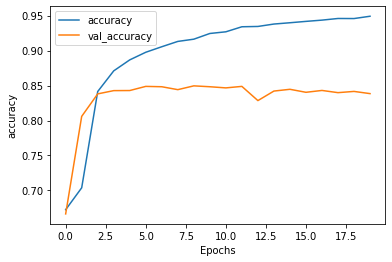

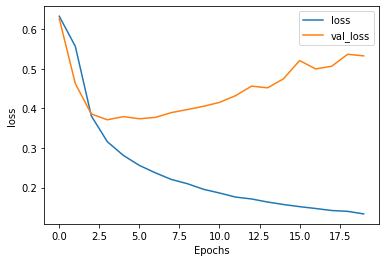

In [ ]:
#Visualization
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## 8.Sentiment analysis

In [ ]:
#Sentiment Analysis
from transformers import pipeline
classifier = pipeline('sentiment-analysis') 
results = classifier(list(df_copy['question']))
results

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.9735258221626282},
 {'label': 'POSITIVE', 'score': 0.9706032276153564},
 {'label': 'NEGATIVE', 'score': 0.998572587966919},
 {'label': 'POSITIVE', 'score': 0.9907925128936768},
 {'label': 'POSITIVE', 'score': 0.9918335676193237},
 {'label': 'NEGATIVE', 'score': 0.7778956890106201},
 {'label': 'NEGATIVE', 'score': 0.9995524287223816},
 {'label': 'NEGATIVE', 'score': 0.9445557594299316},
 {'label': 'NEGATIVE', 'score': 0.9958589673042297},
 {'label': 'NEGATIVE', 'score': 0.9872841835021973},
 {'label': 'POSITIVE', 'score': 0.9617239236831665},
 {'label': 'POSITIVE', 'score': 0.987423837184906},
 {'label': 'NEGATIVE', 'score': 0.9992135763168335},
 {'label': 'NEGATIVE', 'score': 0.998589813709259},
 {'label': 'NEGATIVE', 'score': 0.9982838034629822},
 {'label': 'NEGATIVE', 'score': 0.9762767553329468},
 {'label': 'POSITIVE', 'score': 0.9850430488586426},
 {'label': 'NEGATIVE', 'score': 0.9996229410171509},
 {'label': 'NEGATIVE', 'score': 0.997349500656127

In [ ]:
#Get sentiment list and apppend into a new sentiment column.
sents = []
scores=[]
for pair in results:
  for key, value in pair.items():
    sents.append(value)

for val in sents:

  if type(val) == float:
    scores.append(val)
    sents.remove(val)  
sents
df_copy['sentiment'] = sents

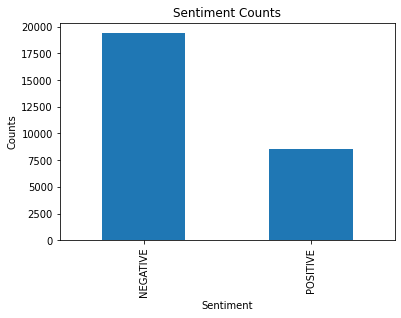

In [ ]:
# count of positive and negative sentiments
import matplotlib.pyplot as plt

df_copy['sentiment'].value_counts().plot.bar()
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [ ]:
#Preview
df_copy.head(3)

,question,label,sentiment
0,where is hat made,0,NEGATIVE
1,does this fit the nike apple watch,0,POSITIVE
2,can it be free return if does not fit correctly,0,NEGATIVE


In [ ]:
#Convert the scores into array
scores=np.array(scores)
#Calculate the of scores
np.mean(scores)

0.952414688044366

Our sentiment analysis model has an average accuracy of 95.24%.

## 9.Feature Engineering.

In [ ]:
#Feature engineering

In [ ]:
# Due to time complexity of the model, we will test this on the first random 140 records of our data
classes = []
df_shuffle = shuffle(df_copy)
df_split = np.array_split(df_shuffle, 200)
chunk = list(df_split[0]['question'])
zero_shot = pipeline('zero-shot-classification')
input_text = chunk
candidate_labels = ['quality', 'price', 'quantity', 'delivery', 'service', 'location']
classifier = zero_shot(input_text, candidate_labels, multi_label=False)
classes.append(classifier)

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

## 10.Model deployment

In [ ]:
#deployment
import pickle
file_name='trained_model.sav'
pickle.dump(zero_shot, open(file_name, 'wb'))

#load the saved model
loaded_model=pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
#Input data
input_data="why is so expensive"
prediction=loaded_model(input_data, candidate_labels, multi_label=False)
#printout of the prediction
print(prediction)

{'sequence': 'why is so expensive', 'labels': ['price', 'quantity', 'service', 'quality', 'delivery', 'location'], 'scores': [0.7819085717201233, 0.055682167410850525, 0.0540095679461956, 0.05019158869981766, 0.0306701622903347, 0.02753797546029091]}


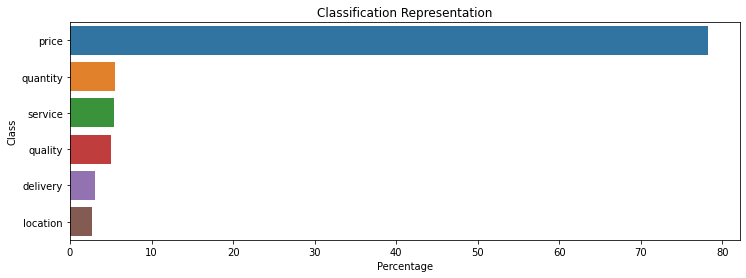

In [ ]:
#Visualization
import seaborn as sns
# convert scores to percentages
for i, x in enumerate(prediction['scores']):
  prediction['scores'][i] = x * 100

plt.figure(figsize=(12,4))
sns.barplot(x = prediction['scores'], y = prediction['labels'], orient='horizontal')
plt.title('Classification Representation')
plt.xlabel('Percentage')
plt.ylabel('Class')
plt.show()

# 11.Challenging the solution.

Even though our model managed to achieve the accuracy score of 83%, the model accuracy score stills lies below the set metric of success for the model of 90%.

## 12 Follow up question.

## a) Did we have the right data

No, since the part of data that gives reasons why the customer classify the question as humorous or non humorous was missing. Due to these we had to do some features engineering to cater for the missing part.

## b)Do we need another data.

Yes, another data is needed and it should include the missing section of the data so that we inhibit the features engineering on the data.

## c)Did we have the right question.

Yes, the question and the objective were clear.